In [1]:
import pandas as pd
import tsfresh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('../data/graded_data.csv')

In [3]:
morpho_grade = pd.DataFrame()

In [4]:
morpho_grade['id'] = df.id.drop_duplicates()

In [5]:
blasto_grade_feats = pickle.load(open('blasto_grade_features.pkl', 'rb'))

In [6]:
columns = ['Patient ID','id', 'tPNf', 't2', 't3', 't4', 't5', 't6', 'Dynamic Score - Time',
           'Morphological Grade - Value',
            'Dynamic Score - Value' ,
           'Morphological Grade - Time', 
           'Grade at approx. 65h - Zoe',
          'Day3 Grade', 'Day3 Cells', 
           'Fragmentation - Time 1',
        'Fragmentation - Value 1',
           'Multi Nucleation - Time 1',
        'Multi Nucleation - Value 1',
          'Blastomere Size - Time 1',
        'Blastomere Size - Value 1',
           'Pronuclei - Time 1',
          'Pronuclei - Value 1']+ ['Multi Nucleation - Time 1',
 'Fragmentation - Time 1',
 'Fragmentation - Value 1',
 'Multi Nucleation - Value 1',
 'Blastomere Size - Time 1',
 'Blastomere Size - Value 1',
 'Pronuclei - Time 1',
 'Pronuclei - Value 1', 'Age']

In [7]:
columns = list(set(columns))

In [8]:
zoe = pd.read_excel('Zoe Final.xlsx')

In [9]:
zoe['id'] =  zoe['Slide ID']+'_'+zoe['Well'].astype(str)

In [10]:
extra_feats = pd.merge(morpho_grade, zoe[columns], on='id', how='left')

In [11]:
blasto_grade_clf = pickle.load(open('blasto_grade_clf.pkl', 'rb'))

In [12]:
extra_feats_cols = ['id', 'Morphological Grade - Value', 'tPNf', 't2', 't3', 't4', 't5', 't6',
       'Dynamic Score - Time', 
       'Morphological Grade - Time', 
      'Fragmentation - Time 1',
       'Fragmentation - Value 1', 'Multi Nucleation - Time 1',
       'Multi Nucleation - Value 1', 'Blastomere Size - Time 1',
       'Blastomere Size - Value 1', 'Pronuclei - Time 1',
       'Pronuclei - Value 1']

In [13]:
keep_columns = ['Patient ID','Slide ID', 'Well' ,'Age','BMI','Diagnosis','tPNf','t2','t3','t4','t5','t6','Multi Nucleation - Time 1',
           'Fertilization Method','Medication Protocol','Medication Trigger','Oocyte History',
       'Oocyte Source','Oocytes Aspirated','Fragmentation - Time 1','Fragmentation - Value 1',
       'Multi Nucleation - Value 1','Blastomere Size - Time 1','Blastomere Size - Value 1',
       'Pronuclei - Time 1','Pronuclei - Value 1', 'Morphological Grade - Value']

categorical_columns = ['Fertilization Method','Medication Protocol',
                       'Medication Trigger','Oocyte History',
                       'Oocyte Source','Oocytes Aspirated',
                       'Pronuclei - Value 1', 'Diagnosis',
                        'BMI',
                       'Multi Nucleation - Value 1']

continuous_columns = [c for c in keep_columns if c not in categorical_columns]
continuous_columns = continuous_columns[3:-1]

categorical_columns = [
                       'Pronuclei - Value 1', 

                       'Multi Nucleation - Value 1']

In [14]:
extra_feats['Blastomere Size - Value 1'] = extra_feats['Blastomere Size - Value 1'].replace('Even',1)
extra_feats['Blastomere Size - Value 1'] = extra_feats['Blastomere Size - Value 1'].replace('Uneven',0)

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [16]:
knn_imp = KNNImputer(n_neighbors=5)
iterative_imp = IterativeImputer(max_iter=10, random_state=0)
# full data imputed

extra_feats.loc[:,categorical_columns] = iterative_imp.fit_transform(extra_feats[categorical_columns])

extra_feats.loc[:,continuous_columns]  = knn_imp.fit_transform(extra_feats[continuous_columns])

In [17]:
extra_feats['t6-t5'] = extra_feats['t6'] - extra_feats['t5']
extra_feats['t6-t4'] = extra_feats['t6'] - extra_feats['t4']
extra_feats['t6-t3'] = extra_feats['t6'] - extra_feats['t3']
extra_feats['t6-t2'] = extra_feats['t6'] - extra_feats['t2']
extra_feats['t6-tPNf'] = extra_feats['t6'] - extra_feats['tPNf']

extra_feats['t5-t4'] = extra_feats['t5'] - extra_feats['t4']
extra_feats['t5-t3'] = extra_feats['t5'] - extra_feats['t3']
extra_feats['t5-t2'] = extra_feats['t5'] - extra_feats['t2']
extra_feats['t5-tPNf'] = extra_feats['t5'] - extra_feats['tPNf']


extra_feats['t4-t3'] = extra_feats['t4'] - extra_feats['t3']
extra_feats['t4-t2'] = extra_feats['t4'] - extra_feats['t2']
extra_feats['t4-tPNf'] = extra_feats['t4'] - extra_feats['tPNf']

extra_feats['t3-t2'] = extra_feats['t3'] - extra_feats['t2']
extra_feats['t3-tPNf'] = extra_feats['t3'] - extra_feats['tPNf']

extra_feats['t2-tPNf'] = extra_feats['t2'] - extra_feats['tPNf']


In [18]:
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('ARREST', 4)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('2,5', 2.5)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('4CC', 3)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('ARREST', 4)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('2,5', 2.5)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('3,5', 3.5)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('4AA', 1)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('EX1', 4)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('1,5', 1.5)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('8', 4)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace('1.2', 1)


extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].astype(float)
extra_feats['Morphological Grade - Value'] = extra_feats['Morphological Grade - Value'].replace(5, 4)

In [19]:
extra_feats['blast_quality'] = blasto_grade_clf.predict_proba(extra_feats[blasto_grade_feats])[:,1]

In [35]:
extra_feats['blast_quality'] 

0       0.520
1       0.260
2       0.500
3       0.570
4       0.450
        ...  
2327    0.575
2328    0.010
2329    0.070
2330    0.060
2331    0.100
Name: blast_quality, Length: 2332, dtype: float64

In [36]:
extra_feats#['Patient ID'].nunique()

,id,Multi Nucleation - Value 1,Patient ID,Day3 Cells,t6,Grade at approx. 65h - Zoe,Pronuclei - Time 1,Fragmentation - Value 1,t3,Day3 Grade,...,t5-t3,t5-t2,t5-tPNf,t4-t3,t4-t2,t4-tPNf,t3-t2,t3-tPNf,t2-tPNf,blast_quality
0,D2016.01.05_S1181_I149_10,2.000000,494704,NaN,53.413009,NaN,18.066570,5.0,37.739866,NaN,...,15.172863,27.510136,30.180257,1.502271,13.839544,16.509664,12.337273,15.007393,2.670121,0.520
1,D2016.01.05_S1181_I149_3,1.000000,494704,NaN,65.068230,NaN,18.050128,15.0,34.888683,NaN,...,11.838124,22.672231,25.010979,3.501603,14.335710,16.674458,10.834107,13.172855,2.338748,0.260
2,D2016.01.05_S1181_I149_5,2.000000,494704,NaN,52.900946,NaN,14.884359,5.0,38.395111,NaN,...,14.339267,27.012241,29.344033,0.506530,13.179504,15.511296,12.672974,15.004766,2.331791,0.500
3,D2016.01.05_S1181_I149_6,2.000000,494704,NaN,52.903254,NaN,13.385803,5.0,38.232680,NaN,...,12.836438,25.511432,27.845741,1.665473,14.340467,16.674776,12.674994,15.009303,2.334309,0.570
4,D2016.01.05_S1181_I149_7,2.000000,494704,NaN,52.739004,NaN,18.059568,15.0,38.399641,NaN,...,14.172505,27.012204,29.346519,0.671051,13.510751,15.845065,12.839699,15.174014,2.334315,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,D2019.05.29_S02006_I0149_D_2,2.000000,506928,NaN,50.907634,1.0,12.644842,5.0,38.653544,NaN,...,12.254090,23.507604,26.758938,1.500419,12.753934,16.005267,11.253515,14.504848,3.251333,0.575
2328,D2019.05.29_S02006_I0149_D_4,0.752701,506928,NaN,38.408758,2.0,14.400252,23.0,25.154028,NaN,...,12.504425,12.504425,15.505303,10.503594,10.503594,13.504472,0.000000,3.000878,3.000878,0.010
2329,D2019.05.29_S02006_I0149_D_5,0.752701,506928,NaN,39.161321,2.0,13.652666,27.0,27.657947,NaN,...,10.753386,11.003743,14.505170,0.000000,0.250357,3.751784,0.250357,3.751784,3.501427,0.070
2330,D2019.05.29_S02006_I0149_D_7,0.752701,506928,NaN,39.416304,2.0,13.908027,23.0,26.662200,NaN,...,11.503874,12.754494,15.255171,11.003754,12.254374,14.755051,1.250619,3.751296,2.500677,0.060


In [37]:
timesteps = pd.read_csv('grade_timesteps.csv')

In [38]:
timesteps['DT']=timesteps.groupby('id').diff()

In [39]:
timesteps = timesteps.groupby('id').DT.mean().reset_index()

In [40]:
(timesteps.groupby('id').DT.mean()*24).reset_index().to_csv('timesteps_.csv', index=False)

In [41]:
test =  pd.merge(df, timesteps, 'inner', on='id')

In [42]:
test['Time'] = test.groupby('id').DT.cumsum()

In [43]:
#test['Time'] = test.groupby('id').apply(lambda x: x['0'].cumsum()).reset_index(drop=True)

In [44]:
import gc
gc.collect()

155

In [45]:
def drop_empty(x):
    area = x.area.values
    if area.min()>3000:
        return x
    
def get_small_t(x):
    if x.Time.iloc[-1]>3:
        return x

def drop_no_fert(x):
    if x.area.values[-1]>5500:
        return x

def drop_early(x):
    if x.Time.max()>4.65:
        return x

In [46]:
clean = test.groupby('id').apply(drop_empty).reset_index(drop=True)
#clean = clean.groupby('id').apply(drop_no_fert).reset_index(drop=True)
clean = clean.groupby('id').apply(drop_early).reset_index(drop=True)
target_area = clean.groupby('id').apply(lambda x: x.loc[x.Time>4.65].iloc[0])
#target_means = clean.groupby('id').apply(lambda x: x.loc[x.Time>4.65].means.iloc[0])

In [51]:
clean.to_csv('C:/Users/hp/Desktop/autodetection/data/area_data.csv', index=False)

In [52]:
features_list = ['eccentricity','minor_axis_length', 'major_axis_length',
                 'area', 'solidity', 'Time', 'perimeter', 'equivalent_diameter',
                'inertia_tensor-0-0', 'inertia_tensor-0-1', 
                'inertia_tensor-1-0', 'inertia_tensor-1-1']

In [53]:
dts = clean[['id', 'DT']].drop_duplicates('id')
dts.index = dts.id

In [66]:
drop_long = clean.groupby('id').apply(lambda x: x.shape[0])<500

In [69]:
same_len_ids = clean.groupby('id').max().area.loc[drop_long]

In [84]:
from scipy.stats import linregress

Text(0, 0.5, 'Area')

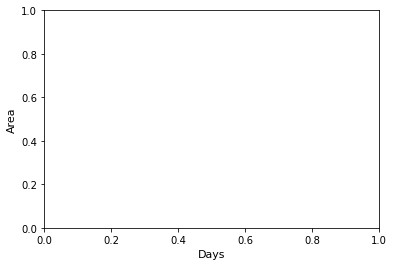

In [114]:
%matplotlib inline
slopes = []
intercepts = []
rs = []
errs = []
max_area = []
for idx in same_len_ids.index[:1000]:
    g = clean.loc[clean.id==idx]
    #print(g['Weeks'].shape[0])
    #t = g.loc[(g['Time_1']<3.5)]
    area__ = g.loc[g['Time']<=3].iloc[-1].area
    final__ = g.area.max()
    #if final__-area__>200:
    color = 'green'
    chunk = g.loc[g['Time']<=3.5]
    slp, intrcpt, rvalue, pvalue, stderr = linregress(chunk['Time'], chunk['area'].cumsum())
    slopes.append(slp)
    intercepts.append(intrcpt)
    rs.append(rvalue)
    errs.append(stderr)
    max_area.append(final__)
    if final__> 15000:
        color='red'
    #plt.plot(chunk['Time'], chunk['perimeter'].cumsum(), color=color)
    
plt.xlabel('Days', fontsize=11)
plt.ylabel('Area', fontsize=11)

In [115]:
fitted = pd.DataFrame()
fitted['slopes'] = slopes
fitted['intercepts'] = intercepts
fitted['rs'] = rs
fitted['errs'] = errs
fitted['max_area'] = max_area


In [116]:
fitted.corr()

,slopes,intercepts,rs,errs,max_area
slopes,1.000000,-0.374076,-0.133977,0.251860,0.110503
intercepts,-0.374076,1.000000,0.524357,-0.583061,0.007911
rs,-0.133977,0.524357,1.000000,-0.954248,0.050245
errs,0.251860,-0.583061,-0.954248,1.000000,-0.027120
max_area,0.110503,0.007911,0.050245,-0.027120,1.000000


Text(0, 0.5, 'Area')

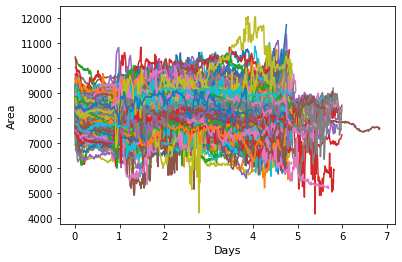

In [36]:
%matplotlib inline
max_ = []
for idx, g in clean.loc[:500000].groupby('id'):
    #print(g['Weeks'].shape[0])
    #t = g.loc[(g['Time_1']<3.5)]
    area__ = g.loc[g['Time']<=3.5].iloc[-1].area
    final__ = g.area.max()
    if final__-area__<2000:
        plt.plot(g['Time'], g['area'])
        #max_.append()
    
plt.xlabel('Days', fontsize=11)
plt.ylabel('Area', fontsize=11)

In [37]:
g['Time']

499628    0.010438
499629    0.020877
499630    0.031315
499631    0.041754
499632    0.052192
            ...   
499996    3.851792
499997    3.862230
499998    3.872669
499999    3.883107
500000    3.893546
Name: Time, Length: 373, dtype: float64

In [117]:
def resample_(x):
    period = '30min'
    new_df = pd.DataFrame()
    
    for c in x.columns:
        if c!='id':
            ts = x.loc[x['Time']<=3.5][c]

            ts.index = pd.DatetimeIndex(x.loc[x['Time']<=3.5]['Time']*8.64e+13)
            ts = ts.resample(period).mean()
            new_df[c] = ts
        else:
            continue
    return new_df


resampled_df = clean[['id']+features_list].groupby('id').apply(resample_)

resampled_df['Time_1'] = resampled_df['Time']
del resampled_df['Time']

resampled_df = resampled_df.reset_index()
# resampled_df['Time_1'] = resampled_df['Time_1']-0.01043



In [118]:
resampled_df['dts'] = resampled_df['id'].map(dts['DT'])

In [119]:
clean

,Unnamed: 0,area,eccentricity,equivalent_diameter,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,moments_normalized-3-0,moments_normalized-3-1,moments_normalized-3-2,moments_normalized-3-3,perimeter,solidity,id,t,DT,Time
0,0,7932,0.180185,100.495453,628.573860,-10.004083,-10.004083,634.405509,101.343774,99.685051,...,-0.000358,0.000161,0.000025,0.000022,331.220346,0.989644,D2016.01.05_S1181_I149_10,1,0.006967,0.006967
1,0,7803,0.236842,99.674912,622.325329,-17.902466,-17.902466,620.354356,101.135111,98.257643,...,-0.000130,0.000340,-0.000004,0.000042,327.806133,0.989475,D2016.01.05_S1181_I149_10,12,0.006967,0.013934
2,0,7896,0.296763,100.267140,623.140292,-28.353816,-28.353816,635.116674,102.614443,97.991773,...,-0.000087,0.000566,0.000011,0.000068,331.220346,0.988854,D2016.01.05_S1181_I149_10,23,0.006967,0.020901
3,0,7737,0.241269,99.252478,614.385805,-18.390996,-18.390996,617.773185,100.760970,97.784307,...,0.000141,0.000337,-0.000008,0.000044,327.806133,0.988880,D2016.01.05_S1181_I149_10,34,0.006967,0.027868
4,0,7814,0.312012,99.745144,624.975317,-31.809920,-31.809920,620.930018,102.358338,97.248425,...,-0.000258,0.000569,0.000042,0.000083,328.735065,0.987988,D2016.01.05_S1181_I149_10,45,0.006967,0.034834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107254,0,8139,0.246710,101.798314,633.996666,-8.546979,-8.546979,671.228500,103.776437,100.568652,...,0.000120,-0.000043,-0.000034,0.000025,352.433550,0.963081,D2019.05.29_S02006_I0149_D_8,467,0.010420,4.876759
1107255,0,8051,0.287239,101.246489,622.240707,-13.834648,-13.834648,670.494763,103.859890,99.483118,...,0.000325,0.000023,-0.000044,0.000039,349.119841,0.965927,D2019.05.29_S02006_I0149_D_8,468,0.010420,4.887180
1107256,0,8086,0.285921,101.466324,630.076176,-20.692383,-20.692383,666.703742,104.001748,99.659998,...,0.000385,0.000252,-0.000044,0.000054,350.776695,0.965839,D2019.05.29_S02006_I0149_D_8,469,0.010420,4.897600
1107257,0,8137,0.271358,101.785805,633.136534,-15.944452,-15.944452,671.476759,104.095413,100.189609,...,0.000208,0.000130,-0.000052,0.000039,352.190909,0.963757,D2019.05.29_S02006_I0149_D_8,470,0.010420,4.908020


In [120]:
resampled_df['Time_1'] = resampled_df['Time_1'] -resampled_df['dts']

In [121]:
clean['Time_1'] = clean['Time'].copy()

In [170]:
X_ = resampled_df.groupby('id').apply(lambda x: x.loc[x.Time_1<=3.5]).reset_index(drop=True)

In [123]:
area_35 = X_.groupby('id').apply(lambda x: x.area.iloc[-1])

In [124]:
sample_ = clean.loc[clean.id=='D2016.01.05_S1181_I149_10']

In [125]:
import seaborn as sns

In [126]:
#f, axes = plt.subplots(4, 1, figsize=(10,14));


In [127]:
# sns.lineplot(y="area", x= "Time", data=sample_, color='red',  ax=axes[0])

# sns.lineplot(y="eccentricity", x= "Time", data=sample_, color='red',  ax=axes[1])

# sns.lineplot(y="inertia_tensor-0-1", x= "Time", data=sample_, color='red',  ax=axes[2])


# sns.lineplot(y="equivalent_diameter", x= "Time", data=sample_, color='red',  ax=axes[3])


Text(0, 0.5, 'Area')

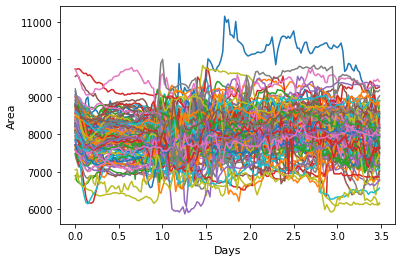

In [128]:
%matplotlib inline
for idx, g in X_.loc[:20000].groupby('id'):
    #print(g['Weeks'].shape[0])
    t = g.loc[(g['Time_1']<3.5)]
    plt.plot(t['Time_1'], t['area'])
    
plt.xlabel('Days', fontsize=11)
plt.ylabel('Area', fontsize=11)

In [129]:
clean

,Unnamed: 0,area,eccentricity,equivalent_diameter,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,moments_normalized-3-1,moments_normalized-3-2,moments_normalized-3-3,perimeter,solidity,id,t,DT,Time,Time_1
0,0,7932,0.180185,100.495453,628.573860,-10.004083,-10.004083,634.405509,101.343774,99.685051,...,0.000161,0.000025,0.000022,331.220346,0.989644,D2016.01.05_S1181_I149_10,1,0.006967,0.006967,0.006967
1,0,7803,0.236842,99.674912,622.325329,-17.902466,-17.902466,620.354356,101.135111,98.257643,...,0.000340,-0.000004,0.000042,327.806133,0.989475,D2016.01.05_S1181_I149_10,12,0.006967,0.013934,0.013934
2,0,7896,0.296763,100.267140,623.140292,-28.353816,-28.353816,635.116674,102.614443,97.991773,...,0.000566,0.000011,0.000068,331.220346,0.988854,D2016.01.05_S1181_I149_10,23,0.006967,0.020901,0.020901
3,0,7737,0.241269,99.252478,614.385805,-18.390996,-18.390996,617.773185,100.760970,97.784307,...,0.000337,-0.000008,0.000044,327.806133,0.988880,D2016.01.05_S1181_I149_10,34,0.006967,0.027868,0.027868
4,0,7814,0.312012,99.745144,624.975317,-31.809920,-31.809920,620.930018,102.358338,97.248425,...,0.000569,0.000042,0.000083,328.735065,0.987988,D2016.01.05_S1181_I149_10,45,0.006967,0.034834,0.034834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107254,0,8139,0.246710,101.798314,633.996666,-8.546979,-8.546979,671.228500,103.776437,100.568652,...,-0.000043,-0.000034,0.000025,352.433550,0.963081,D2019.05.29_S02006_I0149_D_8,467,0.010420,4.876759,4.876759
1107255,0,8051,0.287239,101.246489,622.240707,-13.834648,-13.834648,670.494763,103.859890,99.483118,...,0.000023,-0.000044,0.000039,349.119841,0.965927,D2019.05.29_S02006_I0149_D_8,468,0.010420,4.887180,4.887180
1107256,0,8086,0.285921,101.466324,630.076176,-20.692383,-20.692383,666.703742,104.001748,99.659998,...,0.000252,-0.000044,0.000054,350.776695,0.965839,D2019.05.29_S02006_I0149_D_8,469,0.010420,4.897600,4.897600
1107257,0,8137,0.271358,101.785805,633.136534,-15.944452,-15.944452,671.476759,104.095413,100.189609,...,0.000130,-0.000052,0.000039,352.190909,0.963757,D2019.05.29_S02006_I0149_D_8,470,0.010420,4.908020,4.908020


In [130]:
target_area = clean.groupby('id').apply(lambda x: x.loc[x.Time>=3.5].area.max())
diff = target_area - area_35

In [131]:
(diff.loc[test_ids]>2000).sum()

NameError: name 'test_ids' is not defined

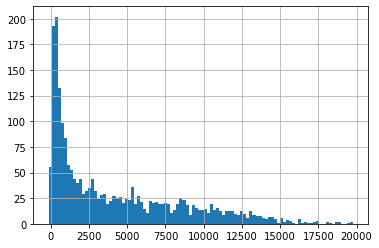

In [132]:
diff.hist(bins=100)

In [133]:
diff.max()

19761.0

In [153]:
X_['area_diff'] = X_.groupby('id')['area'].diff()
X_ = X_.fillna(0)

In [148]:
X_['eccentricity_diff'] = X_.groupby('id')['eccentricity'].diff()
X_ = X_.fillna(0)

In [149]:
X_['minor_axis_length_diff'] = X_.groupby('id')['minor_axis_length'].diff()
X_ = X_.fillna(0)

In [150]:
X_['major_axis_length_diff'] = X_.groupby('id')['major_axis_length'].diff()
X_ = X_.fillna(0)

In [151]:
X_['solidity_diff'] = X_.groupby('id')['solidity'].diff()
X_ = X_.fillna(0)

In [152]:
X_['solidity_sum'] = X_.groupby('id')['solidity'].cumsum()
X_ = X_.fillna(0)

X_['area_sum'] = X_.groupby('id')['area'].cumsum()
X_ = X_.fillna(0)

X_['eccentricity_sum'] = X_.groupby('id')['eccentricity'].cumsum()
X_ = X_.fillna(0)

X_['minor_axis_length_sum'] = X_.groupby('id')['minor_axis_length'].cumsum()
X_ = X_.fillna(0)

X_['major_axis_length_sum'] = X_.groupby('id')['major_axis_length'].cumsum()
X_ = X_.fillna(0)



In [ ]:
X_.area.cumsum()

In [172]:
X_.groupby('id').cumsum()

,eccentricity,minor_axis_length,major_axis_length,area,solidity,perimeter,equivalent_diameter,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,Time_1,dts
0,0.208513,98.971347,101.239442,7.867500e+03,0.989560,329.513239,100.085183,625.449594,-13.953275,-13.953275,627.379933,0.003483,0.006967
1,0.491862,196.646182,203.150692,1.568317e+04,1.978134,658.767087,199.840104,1246.283399,-40.138185,-40.138185,1251.986558,0.024384,0.013934
2,0.792314,294.146751,305.391811,2.351017e+04,2.968224,986.997246,299.668103,1871.552918,-69.632291,-69.632291,1874.203741,0.066185,0.020901
3,1.109140,391.523961,408.070826,3.136050e+04,3.957139,1316.769877,399.644695,2490.432041,-102.048791,-102.048791,2506.917576,0.128887,0.027868
4,1.439040,488.760751,511.076111,3.922417e+04,4.945782,1646.347245,499.705853,3105.501670,-136.065533,-136.065533,3145.928563,0.212490,0.034834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364555,57.770079,16117.733411,17394.281264,1.329186e+06,159.164395,56957.243290,16656.758740,108557.314150,-3647.128190,-3647.128190,105997.876670,277.709553,1.708950
364556,58.062496,16218.314763,17499.476463,1.337423e+06,160.125428,57314.019985,16759.171030,109213.346709,-3676.076035,-3676.076035,106665.770885,281.122243,1.719370
364557,58.361463,16319.565015,17605.584502,1.345810e+06,161.092843,57669.867748,16862.511573,109871.240524,-3704.082637,-3704.082637,107352.290295,284.555773,1.729791
364558,58.629397,16421.130210,17711.004192,1.354160e+06,162.057103,58026.765764,16965.620982,110527.470832,-3725.080659,-3725.080659,108035.360015,288.010144,1.740211


In [163]:
X_.groupby('id').area.cumsum()

0         7.867500e+03
1         1.568317e+04
2         2.351017e+04
3         3.136050e+04
4         3.922417e+04
              ...     
364555    1.329186e+06
364556    1.337423e+06
364557    1.345810e+06
364558    1.354160e+06
364559    1.362474e+06
Name: area, Length: 364560, dtype: float64

In [165]:
features_list = ['eccentricity','minor_axis_length', 'major_axis_length',
                 'area','area_diff', 'eccentricity_diff', 'solidity', 'Time_1',
                'major_axis_length_diff', 'eccentricity_diff', 'minor_axis_length_diff',
                'solidity_diff','perimeter', 'equivalent_diameter',
                'inertia_tensor-0-0', 'inertia_tensor-0-1', 
                'inertia_tensor-1-0', 'inertia_tensor-1-1', 'solidity_sum',
                'area_sum', 'eccentricity_sum', 'minor_axis_length_sum', 'major_axis_length_sum']
'''
'means', 'std',
'equivalent_diameter', 'inertia_tensor-0-0',
                'inertia_tensor-1-1', 'perimeter', 'convex_area', 'moments_normalized-0-2', 
                 'moments_normalized-1-1', 'moments_normalized-2-0']
                 

       , , 'inertia_tensor-0-1',
       'inertia_tensor-1-0', , 'major_axis_length',
       'minor_axis_length', 'moments-0-0', 'moments-0-1', 'moments-0-2',
       'moments-0-3', 'moments-1-0', 'moments-1-1', 'moments-1-2',
       'moments-1-3', 'moments-2-0', 'moments-2-1', 'moments-2-2',
       'moments-2-3', 'moments-3-0', 'moments-3-1', 'moments-3-2',
       'moments-3-3', 'orientation',
       , , 'solidity', 'id']'''

"\n'means', 'std',\n'equivalent_diameter', 'inertia_tensor-0-0',\n                'inertia_tensor-1-1', 'perimeter', 'convex_area', 'moments_normalized-0-2', \n                 'moments_normalized-1-1', 'moments_normalized-2-0']\n                 \n\n       , , 'inertia_tensor-0-1',\n       'inertia_tensor-1-0', , 'major_axis_length',\n       'minor_axis_length', 'moments-0-0', 'moments-0-1', 'moments-0-2',\n       'moments-0-3', 'moments-1-0', 'moments-1-1', 'moments-1-2',\n       'moments-1-3', 'moments-2-0', 'moments-2-1', 'moments-2-2',\n       'moments-2-3', 'moments-3-0', 'moments-3-1', 'moments-3-2',\n       'moments-3-3', 'orientation',\n       , , 'solidity', 'id']"

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [167]:
#X_[features_list] = scaler.fit_transform(X_[features_list])

In [168]:
X_[['id']+features_list]

,id,eccentricity,minor_axis_length,major_axis_length,area,area_diff,eccentricity_diff,solidity,Time_1,major_axis_length_diff,...,equivalent_diameter,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,solidity_sum,area_sum,eccentricity_sum,minor_axis_length_sum,major_axis_length_sum
0,D2016.01.05_S1181_I149_10,0.208513,98.971347,101.239442,7867.500000,0.000000,0.000000,0.989560,0.003483,0.000000,...,100.085183,625.449594,-13.953275,-13.953275,627.379933,0.989560,7.867500e+03,0.208513,98.971347,101.239442
1,D2016.01.05_S1181_I149_10,0.283348,97.674835,101.911250,7815.666667,-51.833333,0.074835,0.988574,0.020901,0.671808,...,99.754921,620.833804,-26.184911,-26.184911,624.606626,1.978134,1.568317e+04,0.491862,196.646182,203.150692
2,D2016.01.05_S1181_I149_10,0.300453,97.500569,102.241119,7827.000000,11.333333,0.017105,0.990090,0.041801,0.329869,...,99.828000,625.269519,-29.494106,-29.494106,622.217182,2.968224,2.351017e+04,0.792314,294.146751,305.391811
3,D2016.01.05_S1181_I149_10,0.316826,97.377210,102.679014,7850.333333,23.333333,0.016373,0.988915,0.062702,0.437895,...,99.976591,618.879123,-32.416499,-32.416499,632.713835,3.957139,3.136050e+04,1.109140,391.523961,408.070826
4,D2016.01.05_S1181_I149_10,0.329900,97.236790,103.005285,7863.666667,13.333333,0.013074,0.988643,0.083603,0.326271,...,100.061159,615.069630,-34.016742,-34.016742,639.010988,4.945782,3.922417e+04,1.439040,488.760751,511.076111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364555,D2019.05.29_S02006_I0149_D_8,0.269706,100.937568,104.823523,8243.500000,52.500000,0.041857,0.964090,3.391849,0.809269,...,102.449355,656.413814,-24.409175,-24.409175,667.117640,159.164395,1.329186e+06,57.770079,16117.733411,17394.281264
364556,D2019.05.29_S02006_I0149_D_8,0.292417,100.581353,105.195200,8237.500000,-6.000000,0.022711,0.961033,3.412689,0.371677,...,102.412290,656.032559,-28.947845,-28.947845,667.894215,160.125428,1.337423e+06,58.062496,16218.314763,17499.476463
364557,D2019.05.29_S02006_I0149_D_8,0.298966,101.250252,106.108039,8387.500000,150.000000,0.006549,0.967415,3.433530,0.912839,...,103.340544,657.893814,-28.006602,-28.006602,686.519410,161.092843,1.345810e+06,58.361463,16319.565015,17605.584502
364558,D2019.05.29_S02006_I0149_D_8,0.267934,101.565195,105.419690,8350.000000,-37.500000,-0.031033,0.964260,3.454371,-0.688349,...,103.109409,656.230309,-20.998022,-20.998022,683.069720,162.057103,1.354160e+06,58.629397,16421.130210,17711.004192


In [169]:
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
settings = EfficientFCParameters()
# Set here the options of the settings object as shown in the paragraphs below
from tsfresh.feature_extraction import extract_features
extracted_feats = extract_features(X_[['id']+features_list].dropna(),
                                    column_id='id',
                                  n_jobs=26)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
extracted_feats

variable,Time_1__abs_energy,Time_1__absolute_sum_of_changes,"Time_1__agg_autocorrelation__f_agg_""mean""__maxlag_40","Time_1__agg_autocorrelation__f_agg_""median""__maxlag_40","Time_1__agg_autocorrelation__f_agg_""var""__maxlag_40","Time_1__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","Time_1__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","Time_1__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","Time_1__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","Time_1__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",...,solidity_diff__symmetry_looking__r_0.9500000000000001,solidity_diff__time_reversal_asymmetry_statistic__lag_1,solidity_diff__time_reversal_asymmetry_statistic__lag_2,solidity_diff__time_reversal_asymmetry_statistic__lag_3,solidity_diff__value_count__value_-1,solidity_diff__value_count__value_0,solidity_diff__value_count__value_1,solidity_diff__variance,solidity_diff__variance_larger_than_standard_deviation,solidity_diff__variation_coefficient
id,,,,,,,,,,,,,,,,,,,,,
D2016.01.05_S1181_I149_10,681.749419,3.479955,0.716345,0.725695,0.029351,0.194116,0.098137,0.002800,0.003712,1.158592,...,1.0,-1.025113e-08,-1.500936e-08,1.445377e-08,0.0,1.0,0.0,0.000012,0.0,-32.662504
D2016.01.05_S1181_I149_3,681.726408,3.479820,0.716360,0.725709,0.029348,0.194109,0.098147,0.002800,0.003711,1.158547,...,1.0,-8.089783e-09,1.659622e-08,-1.700086e-08,0.0,0.0,0.0,0.000024,0.0,-75.282681
D2016.01.05_S1181_I149_5,681.727486,3.479822,0.716360,0.725709,0.029348,0.194109,0.098147,0.002800,0.003711,1.158548,...,1.0,-5.840816e-08,1.045887e-08,3.349705e-08,0.0,0.0,0.0,0.000023,0.0,-30.927041
D2016.01.05_S1181_I149_6,681.754008,3.479890,0.716360,0.725709,0.029348,0.194113,0.098149,0.002800,0.003712,1.158570,...,1.0,-1.326310e-07,-1.373811e-07,-6.147856e-08,0.0,0.0,0.0,0.000039,0.0,24.748930
D2016.01.05_S1181_I149_7,681.754543,3.479892,0.716360,0.725709,0.029348,0.194113,0.098149,0.002800,0.003712,1.158570,...,1.0,-1.185110e-08,-1.723693e-08,-4.035118e-09,0.0,0.0,0.0,0.000011,0.0,-40.549053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2019.05.29_S02006_I0149_D_2,677.283820,3.475078,0.716751,0.726177,0.029305,0.186437,0.090726,-0.004086,0.003690,1.149329,...,1.0,3.725655e-08,-1.399500e-07,-5.270273e-08,0.0,0.0,0.0,0.000034,0.0,-99.328436
D2019.05.29_S02006_I0149_D_4,677.314806,3.475158,0.716751,0.726177,0.029305,0.186441,0.090728,-0.004086,0.003690,1.149355,...,1.0,-6.985138e-09,-1.772767e-08,4.185856e-08,0.0,0.0,0.0,0.000026,0.0,68.874826
D2019.05.29_S02006_I0149_D_5,677.315845,3.475160,0.716751,0.726177,0.029305,0.186441,0.090728,-0.004086,0.003690,1.149356,...,1.0,-2.350688e-08,-5.571524e-08,-1.657676e-08,0.0,0.0,0.0,0.000033,0.0,57.354655


In [67]:
# from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
# settings = EfficientFCParameters()
# # Set here the options of the settings object as shown in the paragraphs below
# from tsfresh.feature_extraction import extract_features
# extracted_feats = extract_features(X_[['id']+features_list].dropna(), default_fc_parameters=settings, column_id='id')

In [68]:
# from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
# settings = MinimalFCParameters()
# # Set here the options of the settings object as shown in the paragraphs below
# from tsfresh.feature_extraction import extract_features
# extracted_feats_lean = extract_features(X_[['id']+features_list].dropna(), default_fc_parameters=settings, column_id='id')

In [69]:
from sklearn.decomposition import PCA


In [70]:
extracted_feats_pca_df = pd.DataFrame(extracted_feats)

In [71]:
extracted_feats_pca_df.index = extracted_feats.index

In [72]:
extracted_feats_pca_df = extracted_feats.reset_index()

In [73]:
extra_feats

,id,t5,Morphological Grade - Time,Age,Dynamic Score - Time,Day3 Grade,t6,Pronuclei - Value 1,tPNf,t3,...,t5-t3,t5-t2,t5-tPNf,t4-t3,t4-t2,t4-tPNf,t3-t2,t3-tPNf,t2-tPNf,blast_quality
0,D2016.01.05_S1181_I149_10,52.912730,67.423506,42.00,67.423506,NaN,53.413009,2.0,22.732473,37.739866,...,15.172863,27.510136,30.180257,1.502271,13.839544,16.509664,12.337273,15.007393,2.670121,0.520
1,D2016.01.05_S1181_I149_3,46.726808,66.735494,42.00,63.067403,NaN,65.068230,2.0,21.715828,34.888683,...,11.838124,22.672231,25.010979,3.501603,14.335710,16.674458,10.834107,13.172855,2.338748,0.260
2,D2016.01.05_S1181_I149_5,52.734378,67.240455,42.00,67.240455,NaN,52.900946,2.0,23.390346,38.395111,...,14.339267,27.012241,29.344033,0.506530,13.179504,15.511296,12.672974,15.004766,2.331791,0.500
3,D2016.01.05_S1181_I149_6,51.069118,66.242347,42.00,33.063804,NaN,52.903254,2.0,23.223377,38.232680,...,12.836438,25.511432,27.845741,1.665473,14.340467,16.674776,12.674994,15.009303,2.334309,0.570
4,D2016.01.05_S1181_I149_7,52.572146,67.244947,42.00,67.244947,NaN,52.739004,2.0,23.225628,38.399641,...,14.172505,27.012204,29.346519,0.671051,13.510751,15.845065,12.839699,15.174014,2.334315,0.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,D2019.05.29_S02006_I0149_D_2,50.907634,64.662366,32.06,64.662366,NaN,50.907634,2.0,24.148696,38.653544,...,12.254090,23.507604,26.758938,1.500419,12.753934,16.005267,11.253515,14.504848,3.251333,0.575
2328,D2019.05.29_S02006_I0149_D_4,37.658453,65.167907,32.06,25.154028,NaN,38.408758,2.0,22.153150,25.154028,...,12.504425,12.504425,15.505303,10.503594,10.503594,13.504472,0.000000,3.000878,3.000878,0.010
2329,D2019.05.29_S02006_I0149_D_5,38.411333,69.172161,32.06,27.657947,NaN,39.161321,2.0,23.906163,27.657947,...,10.753386,11.003743,14.505170,0.000000,0.250357,3.751784,0.250357,3.751784,3.501427,0.070
2330,D2019.05.29_S02006_I0149_D_7,38.166074,64.925165,32.06,64.925165,NaN,39.416304,2.0,22.910903,26.662200,...,11.503874,12.754494,15.255171,11.003754,12.254374,14.755051,1.250619,3.751296,2.500677,0.060


In [74]:
whole = pd.merge(extracted_feats_pca_df, extra_feats.reset_index(drop=True), on='id')

In [75]:
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('ARREST', 4)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('2,5', 2.5)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('4CC', 3)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('ARREST', 4)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('2,5', 2.5)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('3,5', 3.5)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('4AA', 1)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('EX1', 4)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('1,5', 1.5)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('8', 4)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace('1.2', 1)


whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].astype(float)
whole['Morphological Grade - Value'] = whole['Morphological Grade - Value'].replace(5, 4)

In [76]:
#whole = extracted_feats_pca_df.copy()

In [77]:
#for_extract = whole[['id', 'Morphological Grade - Value']]

In [78]:
#for_extract['diff_normalized']  = y.values

In [79]:
#for_extract['id'] = lbl_enc.inverse_transform(for_extract['id'])

In [80]:
#for_extract.to_csv('id_grade.csv', index=False)

In [81]:
 whole[ 'Morphological Grade - Value'].value_counts()

2.0    673
2.5    492
1.5    374
3.0    290
1.0    189
3.5    116
4.0     36
Name: Morphological Grade - Value, dtype: int64

In [82]:
lbl_enc = LabelEncoder()

In [83]:
#whole['id'] = lbl_enc.fit_transform(whole['id'].values[:,None])

In [84]:
images_feats = pd.read_csv('images_extracted_corr.csv')

In [85]:
images_feats.head()

,id,332__longest_strike_above_mean,1633__index_mass_quantile__q_0.8,"577__fft_coefficient__attr_""imag""__coeff_12","640__fft_coefficient__attr_""abs""__coeff_73","1633__fft_coefficient__attr_""imag""__coeff_49","625__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","1730__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0",1730__mean_change,"592__fft_coefficient__attr_""abs""__coeff_61",...,"1665__fft_coefficient__attr_""abs""__coeff_77","142__fft_coefficient__attr_""imag""__coeff_82",1678__ar_coefficient__coeff_7__k_10,1678__symmetry_looking__r_0.30000000000000004,"770__agg_autocorrelation__f_agg_""var""__maxlag_40",572__ratio_beyond_r_sigma__r_6,"277__agg_autocorrelation__f_agg_""var""__maxlag_40","547__fft_coefficient__attr_""imag""__coeff_36","157__fft_coefficient__attr_""angle""__coeff_73","1730__fft_coefficient__attr_""real""__coeff_50"
0,D2016.01.05_S1181_I149_3,43.0,0.809524,0.038594,0.006577,0.003074,0.051080,-0.000036,-0.000036,0.012529,...,0.004283,0.001189,0.038521,1.0,0.101876,0.0,0.052564,0.008970,-6.698967,0.012155
1,D2016.01.05_S1181_I149_5,18.0,0.803571,0.007509,0.008139,0.000159,0.052547,0.000001,0.000001,0.001125,...,0.007971,-0.000646,0.082885,1.0,0.048005,0.0,0.019142,0.008723,-46.598162,-0.005336
2,D2016.01.05_S1181_I149_6,30.0,0.797619,-0.023860,0.002404,0.001594,0.045463,-0.000009,-0.000009,0.012769,...,0.003091,-0.011665,-0.056551,1.0,0.072254,0.0,0.099313,-0.017314,121.760055,-0.004900
3,D2016.01.05_S1181_I149_7,23.0,0.803571,0.007712,0.001106,0.002004,0.050448,-0.000002,-0.000002,0.004010,...,0.004904,-0.000039,0.139646,1.0,0.025633,0.0,0.098714,0.002886,122.461136,-0.000201
4,D2016.01.05_S1181_I149_8,63.0,0.803571,0.001085,0.003278,-0.005561,0.046985,-0.000001,-0.000001,0.003027,...,0.003353,0.010693,-0.025347,1.0,0.031977,0.0,0.078096,-0.000177,-111.548178,0.000498


In [86]:
mrgd_big = pd.merge(whole, images_feats, on='id', how='right')

In [87]:
X = whole.dropna(axis=1)
y = diff.copy()
#del X[0], X['id']

In [88]:
X.index = X.id

In [89]:
y = y.loc[X.id]

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
train_ids, test_ids = train_test_split(resampled_df.id.unique(), test_size=0.15 ,random_state=0)

In [92]:
train_ids = [i for i in train_ids if i in list(y.index)]

In [93]:
#np.save('train_ids.npy', train_ids)
#np.save('test_ids.npy', test_ids)

In [94]:
#emb_weights = np.load('emb_weights.npy')

In [95]:
#X = pd.read_csv('final paper attempt/run_6_top_2000_feats.csv')
#y = pd.read_csv('final paper attempt/run_6_target.csv')

In [96]:
train_idx = [c for c in train_ids if c in list(y.index)]

In [97]:
valid_idx = test_ids

In [98]:
import seaborn as sns

In [99]:
num_feats = 1000

In [100]:
corrs = abs(X.iloc[:,1:].corrwith(y)).sort_values()

In [101]:
corrs.dropna().index

Index(['Time_1__index_mass_quantile__q_0.1',
       'Time_1__index_mass_quantile__q_0.6',
       'Time_1__index_mass_quantile__q_0.4',
       'Time_1__index_mass_quantile__q_0.2',
       'Time_1__index_mass_quantile__q_0.3',
       'Time_1__first_location_of_maximum',
       'eccentricity_diff__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)',
       'eccentricity__approximate_entropy__m_2__r_0.1',
       'area_diff__fft_coefficient__attr_"imag"__coeff_44',
       'eccentricity__fft_coefficient__attr_"angle"__coeff_21',
       ...
       't2', 'minor_axis_length_diff__index_mass_quantile__q_0.9',
       'area_diff__index_mass_quantile__q_0.9',
       'area_diff__index_mass_quantile__q_0.8',
       'perimeter__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"min"',
       'perimeter__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
       'perimeter__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"min"',
       'major_axis_length_diff__index_mass_quantile__q_0

In [102]:
corr_feats = list(corrs.loc[corrs>0.05].index)[-num_feats:]

In [103]:
corr_support = corrs.dropna()>0.1

In [104]:
len(corr_feats)

1000

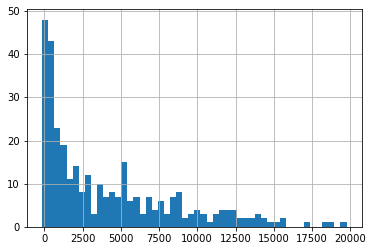

In [105]:
y.loc[test_ids].hist(bins=50)

In [106]:
zoes_pred = pd.read_excel('Copy of test_set_ids(8388).xlsx')

In [107]:
zoes_pred['Blast (Yes/No)'].value_counts()

Y    208
N    115
?      3
Name: Blast (Yes/No), dtype: int64

In [108]:
zoes_pred['Blast (Yes/No)'] = zoes_pred['Blast (Yes/No)'].replace('?', 'N')

In [109]:
zoes_pred['id'] = zoes_pred['Slide ID']+'_'+zoes_pred['Well'].astype(str)

In [110]:
zoes_pred['labels'] = (y[zoes_pred.id]>2000).values

In [111]:
zoes_pred.index = zoes_pred.id

In [112]:
X_test.shape


NameError: name 'X_test' is not defined

In [113]:
zoes_pred

,Patient ID,Slide ID,Well,Blast (Yes/No),id,labels
id,,,,,,
D2016.04.19_S1289_I149_2,494199,D2016.04.19_S1289_I149,2,N,D2016.04.19_S1289_I149_2,False
D2016.07.19_S1375_I149_4,486449,D2016.07.19_S1375_I149,4,Y,D2016.07.19_S1375_I149_4,True
D2016.10.04_S1405_I149_7,41016,D2016.10.04_S1405_I149,7,Y,D2016.10.04_S1405_I149_7,True
D2018.09.29_S01872_I0149_D_6,502907,D2018.09.29_S01872_I0149_D,6,N,D2018.09.29_S01872_I0149_D_6,False
D2019.05.29_S02006_I0149_D_4,506928,D2019.05.29_S02006_I0149_D,4,Y,D2019.05.29_S02006_I0149_D_4,False
...,...,...,...,...,...,...
D2018.01.25_S01706_I0149_D_1,500200,D2018.01.25_S01706_I0149_D,1,N,D2018.01.25_S01706_I0149_D_1,False
D2017.06.12_S1574_I149_5,496476,D2017.06.12_S1574_I149,5,Y,D2017.06.12_S1574_I149_5,False
D2016.07.13_S1373_I149_8,496701,D2016.07.13_S1373_I149,8,Y,D2016.07.13_S1373_I149_8,True


In [114]:
from sklearn.metrics import recall_score

In [115]:
recall_score(zoes_pred['labels'], zoes_pred['Blast (Yes/No)']=='Y')

0.807909604519774

In [120]:
roc_auc_score(zoes_pred['labels'], zoes_pred['Blast (Yes/No)']=='Y')

NameError: name 'roc_auc_score' is not defined

In [575]:
zoe
auc : 0.6513589503280226


NameError: name 'array' is not defined

In [117]:
confusion_matrix(y[zoes_pred.id]>2000, zoes_pred['Blast (Yes/No)']=='Y')



NameError: name 'confusion_matrix' is not defined

In [118]:
accuracy_score(y[zoes_pred.id]>2000, zoes_pred['Blast (Yes/No)']=='Y')

NameError: name 'accuracy_score' is not defined

In [119]:
f1_score(y[zoes_pred.id]>2000, zoes_pred['Blast (Yes/No)']=='Y')

NameError: name 'f1_score' is not defined

In [714]:
precision_score(y[zoes_pred.id]>2000, zoes_pred['Blast (Yes/No)']=='Y')

NameError: name 'precision_score' is not defined

In [715]:
test_ids = np.load('test_ids.npy', allow_pickle=True)

In [121]:
test_ids[0]

'D2016.04.19_S1289_I149_2'

In [122]:
temp = pd.DataFrame([], columns=['Slide ID', 'Well'])

In [123]:
temp['Well'] = pd.Series(test_ids).apply(lambda x: x.split('_')[-1])
temp['Slide ID'] = pd.Series(test_ids).apply(lambda x: '_'.join(x.split('_')[:-1]))
temp['id'] = test_ids

In [124]:
extra_feats = extra_feats.reset_index(drop=True)

In [125]:
extra_feats.index = extra_feats['id']

In [126]:

extra_feats.loc[test_ids][['Patient ID']]

,Patient ID
id,
D2016.04.19_S1289_I149_2,494199
D2016.07.19_S1375_I149_4,486449
D2016.10.04_S1405_I149_7,41016
D2018.09.29_S01872_I0149_D_6,502907
D2019.05.29_S02006_I0149_D_4,506928
...,...
D2018.01.25_S01706_I0149_D_1,500200
D2017.06.12_S1574_I149_5,496476
D2016.07.13_S1373_I149_8,496701


In [127]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm_ = MinMaxScaler().fit_transform(X.loc[train_ids][corrs.dropna().index])
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm_, y.loc[train_ids]>2000)
chi_support = chi_selector.get_support()
chi_feature = X[corrs.dropna().index].loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

1000 selected features


In [128]:
X_norm = X[corrs.dropna().index]

In [129]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=ExtraTreesClassifier(n_jobs=30), n_features_to_select=num_feats, step=200, verbose=5)
rfe_selector.fit(X.loc[train_ids][corrs.dropna().index], y.loc[train_ids]>2000)
rfe_support = rfe_selector.get_support()
rfe_feature = X[corrs.dropna().index].loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 11120 features.
Fitting estimator with 10920 features.
Fitting estimator with 10720 features.
Fitting estimator with 10520 features.
Fitting estimator with 10320 features.
Fitting estimator with 10120 features.
Fitting estimator with 9920 features.
Fitting estimator with 9720 features.
Fitting estimator with 9520 features.
Fitting estimator with 9320 features.
Fitting estimator with 9120 features.
Fitting estimator with 8920 features.
Fitting estimator with 8720 features.
Fitting estimator with 8520 features.
Fitting estimator with 8320 features.
Fitting estimator with 8120 features.
Fitting estimator with 7920 features.
Fitting estimator with 7720 features.
Fitting estimator with 7520 features.
Fitting estimator with 7320 features.
Fitting estimator with 7120 features.
Fitting estimator with 6920 features.
Fitting estimator with 6720 features.
Fitting estimator with 6520 features.
Fitting estimator with 6320 features.
Fitting estimator with 6120 features.
Fittin

In [130]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X.loc[train_ids][corrs.dropna().index], y.loc[train_ids]>2000)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X[corrs.dropna().index].loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')


36 selected features


In [131]:
feature_name = X[corrs.dropna().index].columns.tolist()

In [132]:
from lightgbm import LGBMRegressor, LGBMClassifier, plot_importance

In [133]:
lgbc = LGBMRegressor()

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X.loc[train_ids][corrs.dropna().index].values, y.loc[train_ids]>2000)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X[corrs.dropna().index].loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

1000 selected features


In [134]:
corr_support

Time_1__index_mass_quantile__q_0.1                                       False
Time_1__index_mass_quantile__q_0.6                                       False
Time_1__index_mass_quantile__q_0.4                                       False
Time_1__index_mass_quantile__q_0.2                                       False
Time_1__index_mass_quantile__q_0.3                                       False
                                                                         ...  
perimeter__energy_ratio_by_chunks__num_segments_10__segment_focus_9       True
perimeter__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"min"     True
major_axis_length_diff__index_mass_quantile__q_0.9                        True
Morphological Grade - Value                                               True
blast_quality                                                             True
Length: 11120, dtype: bool

In [135]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,
                                     'Chi-2':chi_support,
                                     'pearson':corr_support,
                                    'lgb':embeded_lgb_support,
                                     'extra': rfe_support,
                                   })
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Chi-2,pearson,lgb,extra,Total
1,t6-tPNf,True,True,True,True,4
2,t6-t5,True,True,True,True,4
3,t6-t3,True,True,True,True,4
4,t5-t4,True,True,True,True,4
5,t4-t3,True,True,True,True,4
...,...,...,...,...,...,...
996,perimeter__energy_ratio_by_chunks__num_segment...,False,True,False,False,1
997,perimeter__energy_ratio_by_chunks__num_segment...,False,False,True,False,1
998,perimeter__energy_ratio_by_chunks__num_segment...,False,True,False,False,1
999,perimeter__energy_ratio_by_chunks__num_segment...,False,False,False,True,1


In [153]:
feat_selection = feature_selection_df.loc[feature_selection_df['Total']>=3].Feature.values.tolist()

In [156]:
len(feat_selection)

247

In [139]:
X.index = X.id

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
#past_top = pd.read_csv('run_15.csv')

In [142]:
do_regr = False


In [143]:
feat_selection


['t6-tPNf',
 't6-t5',
 't6-t3',
 't5-t4',
 't4-t3',
 't3-t2',
 't3',
 't2',
 'solidity_diff__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
 'solidity__fft_coefficient__attr_"angle"__coeff_4',
 'solidity__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"',
 'solidity__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"max"',
 'perimeter__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"min"',
 'minor_axis_length_diff__fft_coefficient__attr_"real"__coeff_1',
 'minor_axis_length_diff__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
 'minor_axis_length__mean_change',
 'minor_axis_length__fft_coefficient__attr_"angle"__coeff_2',
 'minor_axis_length__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"var"',
 'major_axis_length_diff__index_mass_quantile__q_0.9',
 'major_axis_length_diff__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
 'major_axis_length_diff__energy_ratio_by_chunks__num_segments_10__segment_focus_6',
 'major_axis_length__

In [144]:
params = {'verbose': 100, 'objective': 'regression', 'num_rounds':1000 ,

    }

In [145]:
remove = ['blast_quality', 'Morphological Grade - Value']

In [155]:
feat_selection = [f for f in feat_selection if f!='blast_quality']

In [162]:
best_thresh=0.3812709030100334

Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.000293627	valid_1's binary_logloss: 0.105001
Early stopping, best iteration is:
[3]	training's binary_logloss: 0.0264265	valid_1's binary_logloss: 0.0677684
0.8428696014863686
0.8118279569892473


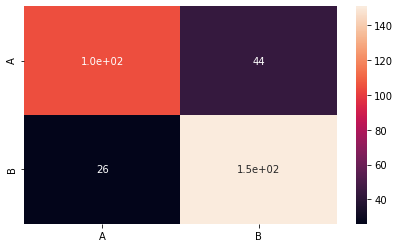

accuracy:  0.7852760736196319

MAE:  0
RMSE:  0
R2:  0
AUC:  0


In [163]:
 %matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GroupKFold, StratifiedKFold
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, roc_auc_score, confusion_matrix, plot_confusion_matrix,
                            accuracy_score, f1_score, roc_curve)
from sklearn.metrics import classification_report
from lightgbm import LGBMRegressor, LGBMClassifier, plot_importance
from xgboost import XGBRegressor
import lightgbm as lgb

Nfolds = 1
#kfold = KFold(Nfolds)
avg_mae = 0
avg_rmse = 0
variance_preds = 0
variance_test = 0
avg_R2 = 0
avg_auc = 0 
#top_feats = np.arange(0,X_droped.shape[1])
#for train_idx, valid_idx in kfold.split(X, y):
X_train, X_test = X[feat_selection].loc[train_ids,:].values, X[feat_selection].loc[test_ids,:].values

y_train, y_test = y.loc[train_ids], y.loc[test_ids]

lgb_train = lgb.Dataset(X_train, y_train, params={'verbose': 1}, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, params={'verbose': 1},free_raw_data=False)
regr = lgb.train(params, 
                 lgb_train, 
                 valid_sets=[lgb_train, lgb_eval],

                 verbose_eval=50,
                early_stopping_rounds=50)
#regr = LGBMRegressor(params={'verbose': 1})
#regr.fit(X_train, y_train)
preds = regr.predict(X_test)
if do_regr:
    sns.set(rc={'figure.figsize':(7,7)})
#         sns.jointplot(x=y_test, y=preds, kind='reg',
#                 joint_kws={'line_kws':{'color':'blue', 'alpha':0.2}, 
#                           'scatter_kws':{'s':4, 'color':'grey'}})
    avg_R2 += r2_score(y_test, preds)/Nfolds
    sns.regplot(x=y_test, y=preds,  scatter_kws={'s':5},
                label=str(np.round(roc_auc_score(y_test>2000, preds),3)))


    plt.ylim(y_test.values.min(), y_test.values.max())
    plt.xlim(y_test.values.min(), y_test.values.max())

    plt.xlabel("Target")
    plt.ylabel("Predictions")

    avg_mae +=mean_absolute_error(preds, y_test)/Nfolds
    avg_rmse += mean_squared_error(preds, y_test, squared=False)/Nfolds


    
    avg_auc+=roc_auc_score(y_test>2000, preds>2000)/Nfolds


    perfect = np.linspace(y.min(), y.max())
    plt.plot(perfect, perfect, linewidth=1, linestyle='--', color='r', alpha=0.5)
    plt.legend()

else:
    y_test = y_test>2000
    y_train = y_train>2000
    clf = LGBMClassifier()
    clf.fit(X_train,y_train)
    params = {'verbose': 100, 'objective': 'binary', 'num_rounds':1000 ,}

    preds = clf.predict_proba(X_test)
    
    print(roc_auc_score(y_test, preds[:,1]))
    print(f1_score(y_test, preds[:,1]>best_thresh))
    df_cm = pd.DataFrame(confusion_matrix(y_test, preds[:,1]>best_thresh), index = [i for i in "AB"],
              columns = [i for i in "AB"])
    plt.figure(figsize = (7,4))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print('accuracy: ', accuracy_score(y_test, preds[:,1]>best_thresh))
   # print('accuracy: ',  confusion_matrix(y_test, np.argmax(preds,axis=1)))
#print('Variance ratio (test/preds): ',variance_test/variance_preds)
print('')
print('MAE: ', np.round(avg_mae, 3))
print('RMSE: ', np.round(avg_rmse, 3))
print('R2: ', np.round(avg_R2, 3))
print('AUC: ', np.round(avg_auc, 3))

In [174]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    return cm

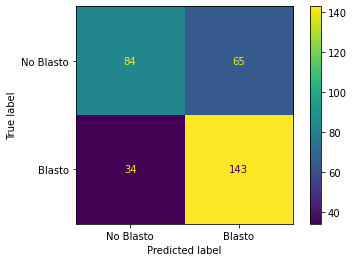

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

cm = confusion_matrix(y_test, preds[:,1]>best_thresh)
cm = np.array([[ 84,  65],
       [ 34, 143]])
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Blasto','Blasto'])
cmd.plot()

In [180]:
disp.im_.colorbar.remove()

NameError: name 'disp' is not defined

In [189]:
np.array([[ 84,  65],
       [ 34, 143]])

array([[ 84,  65],
       [ 34, 143]])

array([[0.70469799, 0.29530201],
       [0.14689266, 0.85310734]])

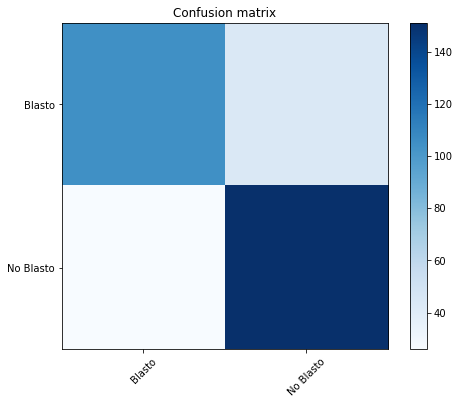

In [175]:
plot_confusion_matrix(confusion_matrix(y_test, preds[:,1]>best_thresh),
                     ['Blasto','No Blasto'])

In [160]:
threshs = np.linspace(0,0.5,300)

f1s = []

for t in threshs:
    f1s.append(f1_score(y_test, preds[:,1]>t))
    
best_thresh = threshs[np.argmax(f1s)]

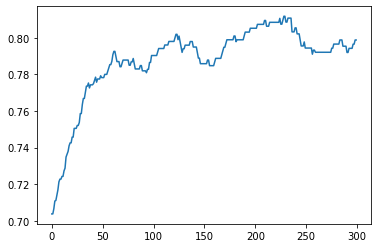

In [165]:
plt.plot(f1s)

In [161]:
threshs[np.argmax(f1s)]

0.3812709030100334

In [850]:
preds[:,1]

array([[0.79571465, 0.20428535],
       [0.29508063, 0.70491937],
       [0.60741524, 0.39258476],
       [0.9686422 , 0.0313578 ],
       [0.97010973, 0.02989027],
       [0.46524954, 0.53475046],
       [0.98094175, 0.01905825],
       [0.95624412, 0.04375588],
       [0.14247588, 0.85752412],
       [0.00696189, 0.99303811],
       [0.13978067, 0.86021933],
       [0.13110073, 0.86889927],
       [0.88155651, 0.11844349],
       [0.04152319, 0.95847681],
       [0.96088205, 0.03911795],
       [0.8422558 , 0.1577442 ],
       [0.23039098, 0.76960902],
       [0.24401722, 0.75598278],
       [0.98717432, 0.01282568],
       [0.27294429, 0.72705571],
       [0.88174478, 0.11825522],
       [0.92952799, 0.07047201],
       [0.68575974, 0.31424026],
       [0.26680418, 0.73319582],
       [0.96966919, 0.03033081],
       [0.9212002 , 0.0787998 ],
       [0.23298503, 0.76701497],
       [0.24272907, 0.75727093],
       [0.94486065, 0.05513935],
       [0.25679372, 0.74320628],
       [0.

In [164]:
print(f1_score(y_test, np.argmax(preds,axis=1)))

0.7988505747126436


In [848]:
X_train.shape

(1844, 675)

In [849]:
X_test.shape

(326, 675)

In [801]:
tpr, fpr, _ = roc_curve(y_test,preds[:,1])

In [ ]:
[[122,34],
[34,142]]

In [882]:
(0.791-0.696)/0.791




0.12010113780025294

In [166]:
0.811*0.0816+0.742

0.8081776

In [167]:
print((0.811-0.742)/0.811)

0.08508014796547479


In [ ]:
AUC: 0.8517043946460394
F1: 0.8079096045197741

accuracy:  0.7914110429447853


In [ ]:
zoe

acc: 0.696319018404908
f1: 0.7428
array([[ 84,  65],
       [ 34, 143]], dtype=int64)

In [375]:
import pickle
pickle.dump((tpr,fpr), open('roc_curve_blasto35.pkl', 'wb'))

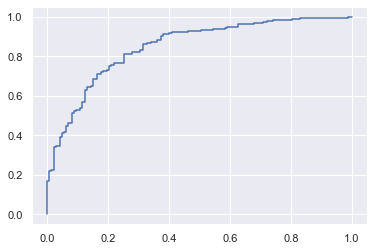

In [754]:
plt.plot(tpr,fpr)

In [287]:
from sklearn.metrics import precision_score

In [288]:
nn_preds = np.load('3d_cnn_preds/1_3.npy')

In [621]:
recall_score(y_test, np.argmax(preds,axis=1))

0.7797619047619048

In [617]:
precision_score(y_test, np.argmax(preds,axis=1))

NameError: name 'precision_score' is not defined

In [291]:
# before ensembling
auc = np.round(roc_auc_score(y_test, preds[:,1]),4)
f1 = np.round(f1_score(y_test,  np.argmax(preds,axis=1)),4)
acc =  np.round(accuracy_score(y_test, np.argmax(preds,axis=1)),4)
print('before ensemble')
print(f'F1: {f1}, AUC: {auc}, ACC: {acc}')
print(confusion_matrix(y_test, np.argmax(preds,axis=1)))
      
print('\nafter ensemble')
    #for i in range(4):
#nn_preds = np.load(f'3d_cnn_preds/{1}.npy')
preds_avg = 0.3*nn_preds+0.7*preds[:,1]

f1 = np.round(f1_score(y_test, preds_avg>0.5),4)
auc = np.round(roc_auc_score(y_test, preds_avg),4)
acc = np.round(accuracy_score(y_test, preds_avg>0.5),4)
print(f'F1: {f1}, AUC: {auc}, ACC: {acc}')
print('AUC: ', )
print(confusion_matrix(y_test, preds_avg>.5),)
print('')

before ensemble
F1: 0.7921, AUC: 0.8527, ACC: 0.773
[[111  36]
 [ 38 141]]

after ensemble
F1: 0.7651, AUC: 0.865, ACC: 0.7607
AUC: 
[[121  26]
 [ 52 127]]



In [174]:
AUC: 0.8616
ACC: 0.7577
F1: 0.7736
RECALL: 0.754
PREC: 0.794
    
[[112  35]
 [ 44 135]]    

SyntaxError: invalid syntax (<ipython-input-174-c80b9885c791>, line 7)

In [666]:

auc : 0.651
acc: 0.696
f1: 0.744
recall: 0.818
prec: 0.692
    
[[ 83,  64],
 [ 35, 144]]


'zoe\nauc : 0.6513589503280226\nacc: 0.696319018404908\nf1: 0.744186046511628  \narray([[ 83,  64],\n       [ 35, 144]], dtype=int64)\n'

In [ ]:
# #for i in range(4):
# nn_preds = np.load(f'3d_cnn_preds/{1}.npy')
# preds_avg = 0.5*nn_preds+0.5*preds[:,1]

# f1 = np.round(f1_score(y_test, preds_avg>0.5),4)
# auc = np.round(roc_auc_score(y_test, preds_avg),4)
# acc = np.round(accuracy_score(y_test, preds_avg>0.5),4)
# print(f'F1: {f1}, AUC: {auc}, ACC: {acc}')
# print('AUC: ', )
# print(confusion_matrix(y_test, preds_avg>.5),)
# print('')

In [ ]:
preds_avg = .5*preds[:,1]+.5*nn_preds

In [ ]:
roc_auc_score(y_test, preds_avg>0.5)

In [ ]:
confusion_matrix(y_test, preds_avg>.5),

In [ ]:
thresh = 2000

In [ ]:
>>> from sklearn import datasets, metrics, model_selection, svm

SVC(random_state=0)
>>> metrics.plot_roc_curve(clf, X_test, y_test)  
>>> plt.show()      

In [912]:
import shap
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)

explainer = shap.TreeExplainer(clf)
sample = X[feat_selection].loc[test_ids,:]#.sample(1000)
shap_values = explainer.shap_values(sample)


In [913]:
y.loc[train_ids]

id
D2019.02.10_S01946_I0149_D_3       26.000000
D2016.06.04_S1331_I149_6         2759.666667
D2019.05.18_S01997_I0149_D_5     5458.000000
D2017.06.22_S1582_I149_10         796.000000
D2019.01.25_S01939_I0149_D_9       -9.000000
                                    ...     
D2017.07.13_S1597_I149_5          379.000000
D2018.06.26_S01836_I0149_D_4     7499.000000
D2017.03.20_S1525_I149_4          699.500000
D2017.05.02_S1541_I149_3        15639.000000
D2018.05.18_S01806_I0149_D_3     1004.000000
Length: 1844, dtype: float64

In [914]:
y.loc[test_ids]

id
D2016.04.19_S1289_I149_2          930.333333
D2016.07.19_S1375_I149_4         2576.333333
D2016.10.04_S1405_I149_7         6883.500000
D2018.09.29_S01872_I0149_D_6      375.500000
D2019.05.29_S02006_I0149_D_4      264.500000
                                    ...     
D2018.01.25_S01706_I0149_D_1     1850.500000
D2017.06.12_S1574_I149_5          802.500000
D2016.07.13_S1373_I149_8         7874.666667
D2018.03.20_S01749_I0149_D_10     568.500000
D2017.03.24_S1529_I149_6          250.000000
Length: 326, dtype: float64

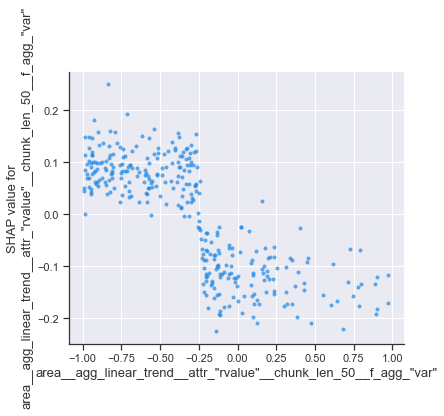

In [915]:
%matplotlib inline
#for i in X_train.columns:
#fig, ax = plt.subplots()
i = 32
shap.dependence_plot(i, shap_values[0], sample, show=False, interaction_index=None,
                     alpha = .7, x_jitter=.1)
#plt.savefig(f'dependence_plot{i}.png', format='png', dpi=800)

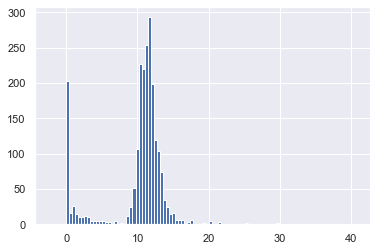

In [916]:
whole['t3-t2'].hist(bins=100)

In [919]:
feat_selection[32]

'area__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"var"'

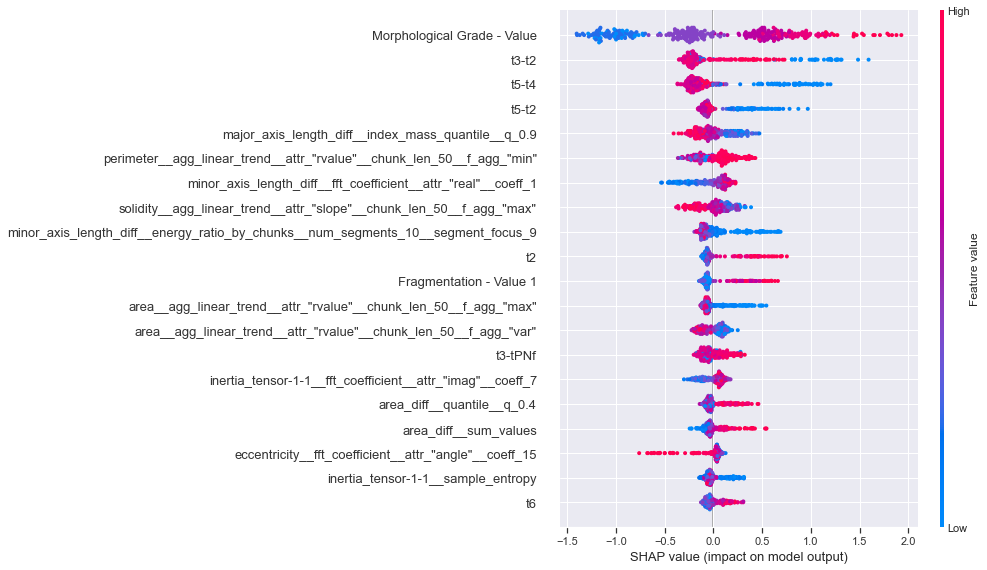

In [918]:
%matplotlib inline
shap.summary_plot(shap_values[0], sample, plot_type='dot')


In [280]:
corr_feats[326]

'major_axis_length_diff__ar_coefficient__coeff_1__k_10'

In [281]:
top_feats_shap = np.argsort(clf.feature_importances_)[:500]

In [282]:
(clf.feature_importances_)

array([18, 24, 21, 18, 11, 13, 21,  4, 10,  7, 38, 20, 17,  5, 16, 20, 25,
       22, 28,  9, 11, 21, 17, 13,  8, 23, 10, 12, 11, 13, 27, 12, 16, 15,
       14,  5,  5, 23,  3, 20, 10, 19,  7, 11, 13, 11,  7, 13,  3, 12, 12,
       18,  7, 33,  9,  6,  7,  8,  9,  8, 17,  0,  1, 12, 25, 10,  8, 12,
       16, 12, 21, 11, 11, 20, 17, 14, 16, 11,  3, 14,  1,  8, 18,  7, 10,
       12,  0,  4,  3,  3,  0,  0, 12, 10,  9, 18,  9,  8,  3,  2, 23, 13,
       23,  0, 12, 12,  9, 14, 23,  6, 19, 33, 26,  0, 26, 19,  4,  7, 34,
        2,  3,  8,  0,  6, 11, 20, 10, 25, 30,  9, 15, 16,  7,  7,  0,  6,
       19,  0,  0,  8, 15,  7, 23,  1, 12, 14,  8,  2, 10, 11,  7, 11,  1,
        0, 22,  8, 42, 18, 29,  3,  4,  7, 15,  6, 31, 10, 23, 22,  0,  0,
       18, 31, 12, 10, 16,  6,  3,  4,  2,  6,  0,  0, 12, 17, 25,  3,  0,
        7,  2,  8,  9,  0, 13,  9, 12, 12, 10, 21, 31, 16, 14,  9, 12, 16,
        6,  6,  7,  7, 13,  4, 15, 27,  6, 32, 12, 11, 14, 12,  7, 13, 13,
        8, 19,  9, 19,  0

In [283]:
top_feats_shap.shape

(262,)

In [ ]:
y_test>3000

In [ ]:
len(np.load('train_ids.npy',allow_pickle=True))+326

In [ ]:
len(train_ids)

In [ ]:
print('MAE: ', avg_mae)
print('RMSE: ', avg_rmse)
print('R2: ', avg_R2)
print('AUC: ', roc_auc_score(y_test>2000, preds))

In [ ]:
sns.regplot(x=y_test, y=y_preds[:,1])

In [ ]:
sns.scatterplot( x=y_test, y=preds,hue=(y_test>2000)&(preds<2000),)

In [ ]:

#sns.scatterplot( x=y_test, y=preds,hue=(preds>2000),)
sns.scatterplot( x=y_test, y=preds,hue=(y_test<2000)&(preds>2000))

In [ ]:
y_test.loc[(y_test>2000)&(preds<2000)]

In [ ]:
y_test.loc[(y_test<2000)&(preds>2000)]

In [ ]:
X.iloc[:,top_feats]

In [ ]:
top_feats = np.argsort(regr.feature_importance())[-400:]

In [ ]:
accuracy_score(y_test, np.argmax(preds,axis=1))

In [ ]:
X_train

In [ ]:
grades_preds['actual'].value_counts()

In [ ]:
grades_preds['grade'].value_counts()

In [ ]:
grades_preds = pd.DataFrame()

In [ ]:
grades_preds['id'] = X.iloc[valid_idx,:]['id']

In [ ]:
grades_preds['grade'] = X.iloc[valid_idx,:]['Morphological Grade - Value']

In [ ]:
grades_preds['predictions'] = enc_target.inverse_transform(np.argmax(preds,axis=1))

In [ ]:
grades_preds['actual'] = classes.iloc[valid_idx]

In [ ]:
for idx, g in grades_preds.groupby('grade'):
    print(g)#.apply(lambda x: x['predictions'])

In [ ]:
df.loc[df.id=='D2019.02.18_S01954_I0149_D_9']

In [ ]:
lbl_enc.inverse_transform([[2068]])

In [ ]:
%matplotlib inline
sns.scatterplot(grades_preds['grade'], grades_preds['predictions'], hue=grades_preds['actual']);
plt.xlabel("Growth")
plt.ylabel("Grade")

In [ ]:
confusion_matrix(y_test, np.argmax(preds,axis=1))

In [ ]:
confusion_matrix(y_test, np.argmax(preds,axis=1))

In [ ]:
pred_classes = enc_target.inverse_transform(np.argmax(preds,axis=1))

In [ ]:
pred_classes[np.argmax(preds,axis=1)!=y_test]

In [ ]:
classes

In [ ]:
classes.loc[valid_idx].values[np.argmax(preds,axis=1)!=y_test]

In [ ]:
confusion_matrix(, )

In [ ]:
miscalassified = pd.DataFrame()

In [ ]:
miscalassified['preds'] = pred_classes[np.argmax(preds,axis=1)!=y_test]
miscalassified['true'] =classes.loc[valid_idx].values[np.argmax(preds,axis=1)!=y_test]

In [ ]:
miscalassified['preds'].value_counts()

In [ ]:
miscalassified['true'].value_counts()

In [ ]:
top_feats = np.argsort(regr.feature_importance())[-1000:]

In [ ]:
mean_absolute_error(np.exp(preds*X_test[:,-1]), np.exp(y_test*X_test[:,-1]))

In [ ]:
y.hist(bins=50)

In [ ]:
lbl_enc.inverse_transform(y.loc[y>6].index)

In [ ]:
temp = whole[['id','Morphological Grade - Value']]

In [ ]:
temp

In [ ]:
temp['target'] = y

In [ ]:
temp.groupby('Morphological Grade - Value').mean()

In [ ]:
temp['target']

In [ ]:
temp['classes'] = y

In [ ]:
temp['classes'].loc[temp['target']>=8] = 'Great'
temp['classes'].loc[(temp['target']<7.8)&(temp['target']>=7.)] = 'Fair'
temp['classes'].loc[(temp['target']<7.)&(temp['target']>=6.5)] = 'OK'
temp['classes'].loc[(temp['target']<6.5)] = 'Bad'      

In [ ]:
temp.loc[(temp['Morphological Grade - Value']==3.)&(temp['classes']=='Great')]

In [ ]:
temp['classes'].value_counts()

In [ ]:
%matplotlib inline
sns.scatterplot(y, X['Morphological Grade - Value'], hue=temp['classes']);
plt.xlabel("Growth")
plt.ylabel("Grade")


In [ ]:
%matplotlib inline
for idx in lbl_enc.inverse_transform(y.loc[y>3000].index):
    t = resampled_df.loc[resampled_df.id==idx]
    t = t.loc[t.Time_1<=5]
    plt.plot(t['Time_1'], t['area'])

In [ ]:
%matplotlib inline
for idx in lbl_enc.inverse_transform(y.loc[y<3000].index):
    t = resampled_df.loc[resampled_df.id==idx]
    t = t.loc[t.Time_1<=5]
    plt.plot(t['Time_1'], t['area'])

In [ ]:

for idx, g in resampled_df.loc[y.loc[y>3000].index].groupby('id'):
    #print(g['Weeks'].shape[0])
    t = g#.loc[g['Time_1']<3.5]
    plt.plot(t['Time_1'], t['area'])

In [ ]:
y.quantile(0.8)

In [ ]:
y.min(), y.max()

In [ ]:
time_grade = plt.hist(zoe.loc[zoe['Morphological Grade - Time']>0]['Morphological Grade - Time'], bins=100,color='red', edgecolor='k', alpha=0.5)
plt.axvline(84, color='k', linestyle='dashed', linewidth=1)

In [ ]:
%matplotlib inline
np.random.seed(6789)

result = plt.hist(y, bins=100)
plt.axvline(2500, color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.show()
#plt.text('above 3000', max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

In [ ]:
y.quantile(0.9)

In [ ]:
y.quantile(.8)

In [ ]:
X.iloc[:,top_feats_100]


In [ ]:
X.iloc[:,top_feats_100].to_csv('final paper attempt/run_11_top_100_feats.csv',index=False)

In [ ]:

y.to_csv('final paper attempt/run_11_target.csv', index=False)

In [ ]:
#roc_auc_score(y_test>3000, preds)

In [ ]:
 %matplotlib notebook
plt.hist(regr.feature_importances_)

In [ ]:
np.argsort(regr.feature_importances_)[-1000:]

In [ ]:
X_train

In [ ]:
top_features = np.unique(np.concatenate(top_feats))

In [ ]:
preds = regre.predict(X_test)

In [ ]:
y_test.max()

In [ ]:
preds.max()

In [ ]:
mean_absolute_error(preds, y_test)

In [ ]:
mean_squared_error(preds, y_test, squared=False)

In [ ]:
idx = np.argsort(regr.feature_importances_)[-300:]

In [ ]:
%matplotlib notebook
feats_less.iloc[:, idx[-6]].hist(bins=100)

In [ ]:

feats_less.values[:, idx[-1]]

In [ ]:
regre.feature_importances_[idx]

In [ ]:
X_


In [ ]:
import tqdm

In [ ]:
clean['id'] = LabelEncoder().fit_transform(clean['id'].values[:,None])[:,None]

In [ ]:
scaler = StandardScaler()

In [ ]:
clean['area'] = scaler.fit_transform(clean['area'].values.reshape(-1, 1))

In [ ]:
clean['Time'] = scaler.fit_transform(clean['Time'].values.reshape(-1, 1))

In [ ]:
clean = test.groupby('id').apply(drop_empty).reset_index(drop=True)
#clean = clean.groupby('id').apply(drop_no_fert).reset_index(drop=True)
clean = clean.groupby('id').apply(drop_early).reset_index(drop=True)
target_area = clean.groupby('id').apply(lambda x: x.loc[x.Time>4.65].area.iloc[0])
#target_means = clean.groupby('id').apply(lambda x: x.loc[x.Time>4.65].means.iloc[0])
#X_ = clean.groupby('id').apply(lambda x: x.loc[x.Time<3.5]).reset_index(drop=True)

In [ ]:
pd.DatetimeIndex(val['Time']*8.64e+13)

In [ ]:
ts = val['area']
ts.index = pd.DatetimeIndex(val['Time']*8.64e+13)

In [ ]:
ts.resample('1H').mean()

In [ ]:
feats

In [ ]:
clean['id'] = LabelEncoder().fit_transform(clean['id'][:,None])

In [ ]:
np.linspace(0,100,30)

In [ ]:
resampled_df#.groupby('id')['Time_1'].max()

In [ ]:
for_extract.groupby('Morphological Grade - Value').mean()

In [ ]:
resampled_df.groupby('id').area.mean()


In [ ]:
count = 0
%matplotlib notebook
count_big = 0
count_small = 0 
for g, val in resampled_df.groupby('id'):
   # if val.area.values[-1]>5500:
    ts = val.loc[val['Time_1']<=6]['area']
    ts.index = pd.DatetimeIndex(val.loc[val['Time_1']<=6]['Time_1']*8.64e+13)
    
    if ts.max()>12000:
        
        plt.plot(ts.resample('30min').mean(), color='green',marker='+', linewidth=1)
        plt.show()
        count_big+=1
    else:
        
        plt.plot(ts.resample('30min').mean(), color='red',marker='*', linewidth=1)
        plt.show()
        count_small+=1
    
    if (count_small>10)&(count_big>10):
        break

In [ ]:

count_small

In [ ]:
def get_sequences(df):
    group = df.groupby('id')
    
    seq_dict = {}
    for idx, g in tqdm.tqdm(group):
        seq_dict[idx] = {'time': g['Time'].values,
                         'area': g['area'].values
            
        }
        
    return seq_dict

In [ ]:
seq_dict = get_sequences(clean[['id', 'Time', 'area']])

In [ ]:
window_size = 50

In [ ]:
device='cuda'

In [ ]:
class SAINT(nn.Module):
    def __init__(self, n_inp=100, n_head=2, n_hidden=64, n_layers=2, dropout=0.1, device='cpu'):
        super(SAINT, self).__init__()
        temp = nn.Transformer()
        self.n_inp = n_inp
        self.attn_mask = temp.generate_square_subsequent_mask(n_inp).to(device)
        self.dropout = nn.Dropout()
        #self.enc_norm = torch.nn.BatchNorm1d(100)

        self.embryo_embedding = nn.Embedding(num_embeddings=2170, embedding_dim=50)
        self.embryo_linear = nn.Linear(1, 50, bias=False)
        self.time_embedding = nn.Linear(1, 50, bias=False)
        self.area_embedding = nn.Linear(1, 50, bias=False)
        self.position_emb_enc = nn.Embedding(num_embeddings=n_inp, embedding_dim=50)
        
        encoder_layer = nn.TransformerEncoderLayer(d_model=50,
                                                   dim_feedforward = 128, nhead=5)
        self.encoder_1 = torch.nn.TransformerEncoder(encoder_layer, 3)
        
        self.final = nn.Linear(50, 1)
        self.device = device

    def positional_encoding(self, content_id):
        with torch.no_grad():
            return torch.arange(0, content_id.shape[1]).to(self.device). \
                unsqueeze(0).repeat(content_id.shape[0], 1)

    def forward(self, embryo_id, time, area):
        # u_emp = self.user_emb(user)
        embryo_emb = self.embryo_embedding(embryo_id)
        embryo_emb = self.embryo_linear(embryo_emb.unsqueeze(2))
        time_emb = self.time_embedding(time.unsqueeze(2))
        
        area = torch.roll(area,1,1)
        area[:,0] = 15
        area_emb = self.time_embedding(area.unsqueeze(2))
        
        pos_emb = self.position_emb_enc(self.positional_encoding(time))
        
        embedded_src = embryo_emb + time_emb + area_emb
        embedded_src += pos_emb
        embedded_src = embedded_src.transpose(0, 1)

        #src_mask = padding_mask  # & self.atn_mask
        #tgt_mask = padding_mask
        attn_mask = self.attn_mask
        
        enc_1 = self.encoder_1(embedded_src, mask = attn_mask)
        
        output = enc_1.transpose(0, 1)
        output = self.final(output)

        return output

In [ ]:
model = SAINT(n_inp=window_size, device=device)

In [ ]:
model.to(device)

In [ ]:
#target_area = clean.groupby('id').apply(lambda x: x.loc[x.Time>4.65].area.iloc[0])

In [ ]:
#target_area.index  = label_enc.transform(np.array(target_area.index))

In [ ]:
#target_area = scaler.fit_transform(target_area.values[:,None])


In [ ]:
window_size = 50

In [ ]:
import random
random_keys = [key for key in seq_dict.keys()]
random.shuffle(random_keys)

In [ ]:
def create_batches(dic, target):
    batches_time = []
    batches_area = []
    batches_y = []
    ids = []
    for key in random_keys:
        value = dic[key]
        t = value['time']
        area = value['area']
        
        rem = len(t)%window_size
        #print(len(t))
        if rem!=0:
            t_full = t[:-rem]
            area_full = area[:-rem]
        else:
            t_full = t
            area_full = area
            
        batches_time.extend(np.split(t_full, len(t_full)/window_size))
        batches_area.extend(np.split(area_full, len(t_full)/window_size))
        batches_y.extend([target[key] for _ in range(len(t_full)//window_size)])
        ids.extend([np.array([key for _ in range(window_size)]) for _ in range(len(t_full)//window_size)])
        
    return batches_time, batches_area, batches_y, ids

In [ ]:
batches_time, batches_area, batches_y, ids = create_batches(seq_dict, target_area)

In [ ]:
ids

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear_1 = nn.Linear(hidden_layer_size, output_size)
        
        self.linear_2 = nn.Linear(window_size, output_size)

        self.hidden_cell = (torch.zeros(1,300,self.hidden_layer_size),
                            torch.zeros(1,300,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        linear = self.linear_1(lstm_out).squeeze(2)
        #linear2 = self.linear_2(linear)
        return linear[:,-1]

In [ ]:
model = LSTM()
loss_function = nn.MSELoss()

model.to('cuda')

In [ ]:
batch_size = 128

In [ ]:
batches_time_tensor = torch.split(torch.tensor(batches_time), batch_size)

In [ ]:
batches_area_tensor = torch.split(torch.tensor(batches_area), batch_size)
batches_target_tensor = torch.split(torch.tensor(batches_y), batch_size)

In [ ]:
ids_tensor = torch.split(torch.tensor(ids), batch_size)

In [ ]:
len(ids_tensor)

In [ ]:
val_batches_time = batches_time_tensor[-5:]
val_batches_area = batches_area_tensor[-5:]
val_batches_target = batches_target_tensor[-5:]
val_batches_ids = ids_tensor[-5:]

In [ ]:
def validate():
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
        val_loss = 0
        for b_idx in tqdm.tqdm(range(5)):
        
            
            ids_batch = val_batches_ids[b_idx][:,0].long().to(device)
            time = val_batches_time[b_idx].float().to(device)
            area = val_batches_area[b_idx].float().to(device)

            y_pred = model(ids_batch, time, area)

            single_loss = loss_function(y_pred[:,:,0], area)
            
            val_loss += single_loss.item()
            #labels.append(val_batches_target[b_idx].flatten()\
                                                            
            #preds.append(y_pred.detach().cpu().numpy())
        print('Val loss: ', val_loss/5)
    #return preds, labels

In [ ]:
validate()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:

epochs = 150

for i in range(epochs):
    model.train()
    loss = 0
    for b_idx in tqdm.tqdm(range(len(batches_area_tensor[:-5]))):
        optimizer.zero_grad()
                                 
        #model.hidden_cell = (torch.zeros(1, window_size, model.hidden_layer_size).to('cuda'),
                        #torch.zeros(1, window_size, model.hidden_layer_size).to('cuda'))
        ids_batch = ids_tensor[b_idx][:,0].long().to(device)
        time = batches_time_tensor[b_idx].float().to(device)
        area = batches_area_tensor[b_idx].float().to(device)
        
        y_pred = model(ids_batch, time, area)

        single_loss = loss_function(y_pred[:,:,0], area)
        single_loss.backward()
        loss += single_loss.item()                         
        optimizer.step()

    validate()
    print(f'epoch: {i} loss: {loss/len(batches_area_tensor[:-5])}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
%debug

In [ ]:
ids_batch.shape

In [ ]:
time.shape

In [ ]:
single_loss

In [ ]:
model.hidden_cell[0].shape

In [ ]:
model(testing_tensor)

In [ ]:
final_(out).squeeze(2).shape